## Objective
Banks and credit card companies want to predict which customers are likely to default next month.
T
his helps them:
1. Reduce financial risk
2. Target high-risk customers with preventive measures
3. Improve approval policies

## Deliverables
### Python Analysis
1. Clean & analyze the dataset
2. Build a classification model (Logistic Regression / Random Forest)
3. Segment customers into risk categories (Low, Medium, High)

### Power BI Dashboard
1. Show overall default trends
2. Profile high-risk customers by Age, Education, 3. Marital Status, Credit Limit
3. Enable slicers for interactive exploration

### Resume Impact Points
1. Metrics from the model
2. Business outcomes & insights
3. Tools used



In [1]:
## Import librariries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Import the dataset
pd.set_option('display.max_columns', None)

df = pd.read_excel("data/default of credit card clients.xls", index_col=0, header=0)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

1. X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

2. X2: Gender (1 = male; 2 = female).

3. X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

4. X4: Marital status (1 = married; 2 = single; 3 = others).

5. X5: Age (year).

6. X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

7. X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [3]:
df = pd.read_excel("data/default of credit card clients.xls", index_col=0, header=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
## Shape
df.shape

(30000, 24)

In [5]:
## Renaming columns for better understanding
df.rename(columns={
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',  # 1=Male, 2=Female
    'EDUCATION': 'Education_Level',  # 1=Graduate, 2=University, 3=High School, 4=Others
    'MARRIAGE': 'Marital_Status',  # 1=Married, 2=Single, 3=Others
    'AGE': 'Age',
    'PAY_0': 'Repayment_Status_Sep',
    'PAY_2': 'Repayment_Status_Aug',
    'PAY_3': 'Repayment_Status_Jul',
    'PAY_4': 'Repayment_Status_Jun',
    'PAY_5': 'Repayment_Status_May',
    'PAY_6': 'Repayment_Status_Apr',
    'BILL_AMT1': 'Bill_Amount_Sep',
    'BILL_AMT2': 'Bill_Amount_Aug',
    'BILL_AMT3': 'Bill_Amount_Jul',
    'BILL_AMT4': 'Bill_Amount_Jun',
    'BILL_AMT5': 'Bill_Amount_May',
    'BILL_AMT6': 'Bill_Amount_Apr',
    'PAY_AMT1': 'Payment_Amount_Sep',
    'PAY_AMT2': 'Payment_Amount_Aug',
    'PAY_AMT3': 'Payment_Amount_Jul',
    'PAY_AMT4': 'Payment_Amount_Jun',
    'PAY_AMT5': 'Payment_Amount_May',
    'PAY_AMT6': 'Payment_Amount_Apr',
    'default payment next month': 'Default_Next_Month'  # Target variable
}, inplace=True)

print("Changes columns name list: ", df.columns)

Changes columns name list:  Index(['Credit_Limit', 'Gender', 'Education_Level', 'Marital_Status', 'Age',
       'Repayment_Status_Sep', 'Repayment_Status_Aug', 'Repayment_Status_Jul',
       'Repayment_Status_Jun', 'Repayment_Status_May', 'Repayment_Status_Apr',
       'Bill_Amount_Sep', 'Bill_Amount_Aug', 'Bill_Amount_Jul',
       'Bill_Amount_Jun', 'Bill_Amount_May', 'Bill_Amount_Apr',
       'Payment_Amount_Sep', 'Payment_Amount_Aug', 'Payment_Amount_Jul',
       'Payment_Amount_Jun', 'Payment_Amount_May', 'Payment_Amount_Apr',
       'Default_Next_Month'],
      dtype='object')


In [6]:
## Asses the datatype of each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Credit_Limit          30000 non-null  int64
 1   Gender                30000 non-null  int64
 2   Education_Level       30000 non-null  int64
 3   Marital_Status        30000 non-null  int64
 4   Age                   30000 non-null  int64
 5   Repayment_Status_Sep  30000 non-null  int64
 6   Repayment_Status_Aug  30000 non-null  int64
 7   Repayment_Status_Jul  30000 non-null  int64
 8   Repayment_Status_Jun  30000 non-null  int64
 9   Repayment_Status_May  30000 non-null  int64
 10  Repayment_Status_Apr  30000 non-null  int64
 11  Bill_Amount_Sep       30000 non-null  int64
 12  Bill_Amount_Aug       30000 non-null  int64
 13  Bill_Amount_Jul       30000 non-null  int64
 14  Bill_Amount_Jun       30000 non-null  int64
 15  Bill_Amount_May       30000 non-null  int64
 16  Bill_Amou

In [7]:
## Checking for unique values of each feature
for col in df.columns:
    print(f"{col} : {df[col].unique()}")

Credit_Limit : [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
Gender : [2 1]
Education_Level : [2 1 3 5 4 6 0]
Marital_Status : [1 2 3 0]
Age : [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
Repayment_Status_Sep : [ 2 -1  0 -2  1  3  4  8  7  5  6]
Repayment_Statu

In [8]:
## Check for numm values
df.isnull().sum()

Credit_Limit            0
Gender                  0
Education_Level         0
Marital_Status          0
Age                     0
Repayment_Status_Sep    0
Repayment_Status_Aug    0
Repayment_Status_Jul    0
Repayment_Status_Jun    0
Repayment_Status_May    0
Repayment_Status_Apr    0
Bill_Amount_Sep         0
Bill_Amount_Aug         0
Bill_Amount_Jul         0
Bill_Amount_Jun         0
Bill_Amount_May         0
Bill_Amount_Apr         0
Payment_Amount_Sep      0
Payment_Amount_Aug      0
Payment_Amount_Jul      0
Payment_Amount_Jun      0
Payment_Amount_May      0
Payment_Amount_Apr      0
Default_Next_Month      0
dtype: int64

In [9]:
## Clean Education Level : collapse unknown/others
df['Education_Level'] = df['Education_Level'].replace({0:4, 5:4, 6:4})

## Clean marital status : 0--> others
df['Marital_Status'] = df['Marital_Status'].replace({0:3})

print("Education Level: ",df['Education_Level'].unique())
print("Marital Status: ",df['Marital_Status'].unique())

Education Level:  [2 1 3 4]
Marital Status:  [1 2 3]


In [10]:
## Target imbalance check
print("Percentage of imbalance: ",df['Default_Next_Month'].value_counts(normalize=True) * 100)
print("Count of imbalance: ",df['Default_Next_Month'].value_counts())

Percentage of imbalance:  Default_Next_Month
0    77.88
1    22.12
Name: proportion, dtype: float64
Count of imbalance:  Default_Next_Month
0    23364
1     6636
Name: count, dtype: int64


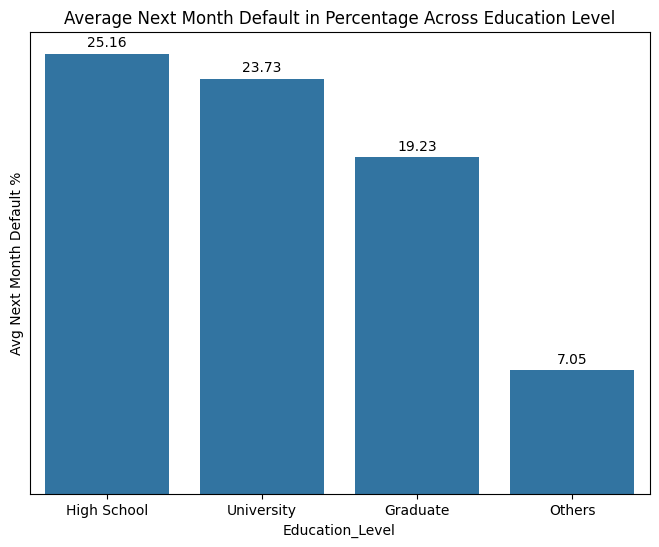

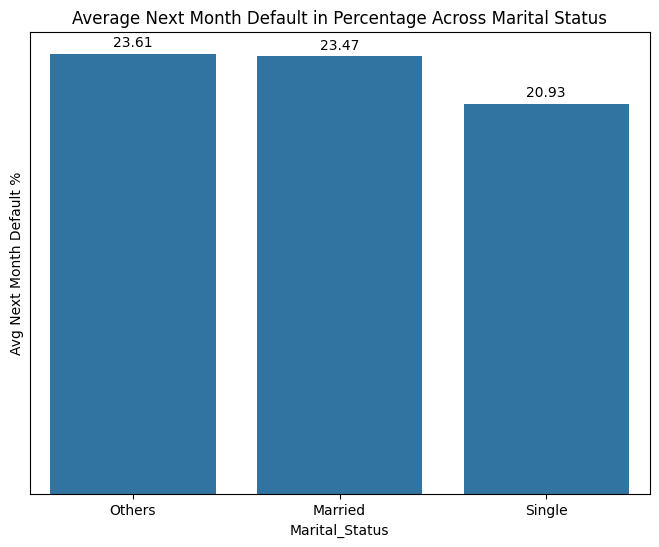

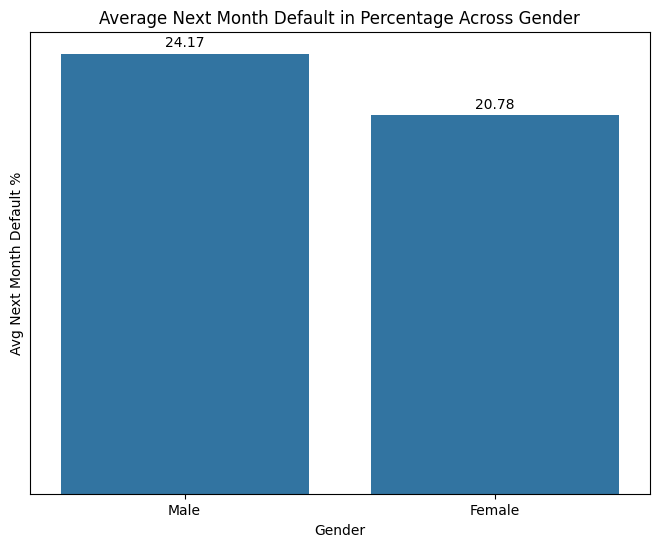

In [11]:
## Performing EDA
## Default rate by Education, Marital Status and Gender

# Education level
edu_default = df.groupby('Education_Level')['Default_Next_Month'].mean().sort_values(ascending=False).reset_index()
edu_default['Default_Next_Month'] = round(edu_default['Default_Next_Month']*100,2)
edu_default['Education_Level'] = edu_default['Education_Level'].map({1:'Graduate', 2:'University', 3:'High School', 4:'Others'})

plt.figure(figsize=(8,6))
g = sns.barplot(data=edu_default, x='Education_Level', y='Default_Next_Month')
plt.title("Average Next Month Default in Percentage Across Education Level")
for bar in g.patches:
    g.annotate(bar.get_height(),
              (bar.get_x()+bar.get_width()/2., bar.get_height()),
              ha='center', va='bottom', fontsize=10,
              xytext=(0,3), textcoords='offset points')
plt.ylabel('Avg Next Month Default %')
plt.yticks([])
plt.show()

# Marital Status
edu_default = df.groupby('Marital_Status')['Default_Next_Month'].mean().sort_values(ascending=False).reset_index()
edu_default['Default_Next_Month'] = round(edu_default['Default_Next_Month']*100,2)
edu_default['Marital_Status'] = edu_default['Marital_Status'].map({1:'Married', 2:'Single', 3:'Others'})

plt.figure(figsize=(8,6))
g = sns.barplot(data=edu_default, x='Marital_Status', y='Default_Next_Month')
plt.title("Average Next Month Default in Percentage Across Marital Status")
for bar in g.patches:
    g.annotate(bar.get_height(),
              (bar.get_x()+bar.get_width()/2., bar.get_height()),
              ha='center', va='bottom', fontsize=10,
              xytext=(0,3), textcoords='offset points')
plt.ylabel('Avg Next Month Default %')
plt.yticks([])
plt.show()

# Gender
edu_default = df.groupby('Gender')['Default_Next_Month'].mean().sort_values(ascending=False).reset_index()
edu_default['Default_Next_Month'] = round(edu_default['Default_Next_Month']*100,2)
edu_default['Gender'] = edu_default['Gender'].map({1:'Male', 2:'Female'})

plt.figure(figsize=(8,6))
g = sns.barplot(data=edu_default, x='Gender', y='Default_Next_Month')
plt.title("Average Next Month Default in Percentage Across Gender")
for bar in g.patches:
    g.annotate(bar.get_height(),
              (bar.get_x()+bar.get_width()/2., bar.get_height()),
              ha='center', va='bottom', fontsize=10,
              xytext=(0,3), textcoords='offset points')
plt.ylabel('Avg Next Month Default %')
plt.yticks([])
plt.show()

### Demographic Insights on Credit Card Default Risk

- **Education:** Default rates were highest among customers with **High School education (25.16%)** and **University degrees (23.73%)**, while **Graduate School** customers showed lower defaults (19.23%).  
- **Marital Status:** Customers in the **Others (23.61%)** and **Married (23.47%)** categories had higher default rates compared to **Singles (20.93%)**.  
- **Gender:** **Males (24.17%)** had a noticeably higher default rate than **Females (20.78%)**.  

**Key Insight:** Lower education levels, being male, and certain marital statuses correlate with a higher likelihood of default, providing clear segmentation opportunities for targeted risk management.


In [12]:
edu_default

,Gender,Default_Next_Month
0,Male,24.17
1,Female,20.78


Average age by default status:
 Default_Next_Month
0    35.417266
1    35.725738
Name: Age, dtype: float64


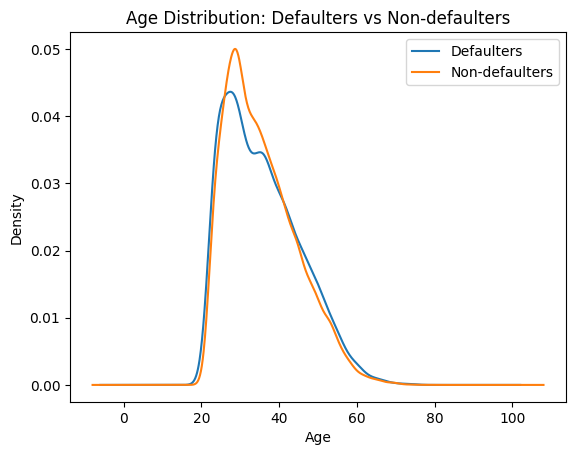

In [15]:
## Distribution of Age across Defaultors and Non-Defaultors
# Summary stats
print("Average age by default status:\n", df.groupby('Default_Next_Month')['Age'].mean())

# KDE plot (you can skip plotting if you prefer just numbers)
plt.figure()
df[df['Default_Next_Month']==1]['Age'].plot(kind='kde', label='Defaulters')
df[df['Default_Next_Month']==0]['Age'].plot(kind='kde', label='Non-defaulters')
plt.legend()
plt.title("Age Distribution: Defaulters vs Non-defaulters")
plt.xlabel("Age")
plt.show()


Default rate by Credit Limit bin:
         Credit_Limit_Bin  Default_Next_Month
0     (9010.0, 208000.0]            0.256110
1   (208000.0, 406000.0]            0.153492
2   (406000.0, 604000.0]            0.122319
3   (604000.0, 802000.0]            0.076923
4  (802000.0, 1000000.0]            0.000000


C:\Users\Vipina m\AppData\Local\Temp\ipykernel_24932\665592747.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  limit_default = df.groupby('Credit_Limit_Bin')['Default_Next_Month'].mean().reset_index()


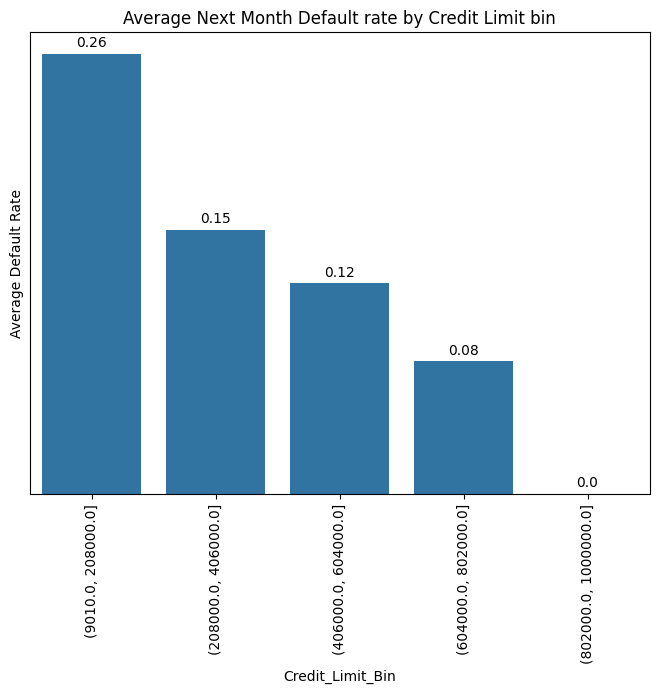

In [36]:
## Credit Limit Bucket vs Defaultors

df['Credit_Limit_Bin'] = pd.cut(df['Credit_Limit'], bins=5)
limit_default = df.groupby('Credit_Limit_Bin')['Default_Next_Month'].mean().reset_index()
print("\nDefault rate by Credit Limit bin:\n", limit_default)

plt.figure(figsize=(8,6))
g = sns.barplot(data=limit_default, x='Credit_Limit_Bin', y='Default_Next_Month')
for bar in g.patches:
    g.annotate(round(bar.get_height(),2), (bar.get_x() + bar.get_width()/2., bar.get_height()), ha='center', va='bottom', xytext=(0,3), textcoords="offset points")
plt.xticks(rotation=90, ha='center')
plt.yticks([])
plt.ylabel('Average Default Rate')
plt.title("Average Next Month Default rate by Credit Limit bin")
plt.show()

### Age and Credit Limit Insights on Default Risk

- **Age:** Defaulting customers are slightly more concentrated in the **25–35 age range**, with the density curve showing a minor leftward shift compared to non-defaulters, indicating marginally younger customers have a higher risk.
- **Credit Limit:** Average Default rate is highest (**26%**) among customers with credit limits between **90K–208K** and drops significantly as credit limits increase, reaching close to **0%** for the highest credit limit tier (>802K).
  
**Key Insight:** Lower credit limits and slightly younger customer profiles are associated with higher default probabilities, highlighting potential thresholds for stricter risk assessment.

### Get correlation(linear or non-linear) between features and target variable if any

In [14]:
df.columns

Index(['Credit_Limit', 'Gender', 'Education_Level', 'Marital_Status', 'Age',
       'Repayment_Status_Sep', 'Repayment_Status_Aug', 'Repayment_Status_Jul',
       'Repayment_Status_Jun', 'Repayment_Status_May', 'Repayment_Status_Apr',
       'Bill_Amount_Sep', 'Bill_Amount_Aug', 'Bill_Amount_Jul',
       'Bill_Amount_Jun', 'Bill_Amount_May', 'Bill_Amount_Apr',
       'Payment_Amount_Sep', 'Payment_Amount_Aug', 'Payment_Amount_Jul',
       'Payment_Amount_Jun', 'Payment_Amount_May', 'Payment_Amount_Apr',
       'Default_Next_Month'],
      dtype='object')


Top 10 features (absolute correlation):
 Default_Next_Month      1.000000
Repayment_Status_Sep    0.324794
Repayment_Status_Aug    0.263551
Repayment_Status_Jul    0.235253
Repayment_Status_Jun    0.216614
Repayment_Status_May    0.204149
Repayment_Status_Apr    0.186866
Credit_Limit            0.153520
Payment_Amount_Sep      0.072929
Payment_Amount_Aug      0.058579
Name: Default_Next_Month, dtype: float64


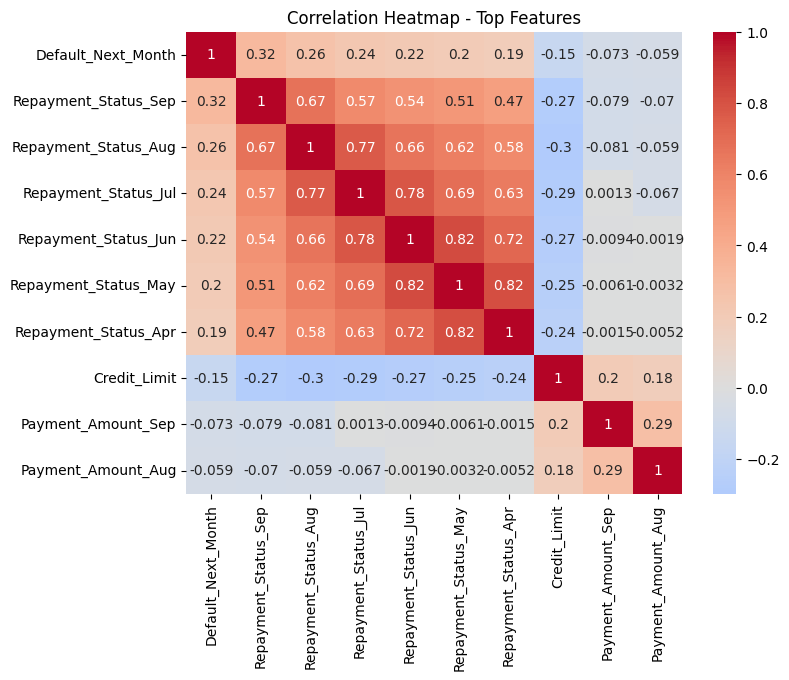

In [38]:
## Determine the top features that are linearly correlated using Pearson's Correlation

# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Correlation with Default_Flag
default_corr = corr_matrix['Default_Next_Month'].sort_values(ascending=False)

# Top 10 correlated features (absolute correlation)
top_corr_features = default_corr.abs().sort_values(ascending=False).head(10)
print("\nTop 10 features (absolute correlation):\n", top_corr_features)

# heatmap of top features
plt.figure(figsize=(8,6))
sns.heatmap(df[top_corr_features.index].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap - Top Features")
plt.show()

### Key Observations (Linear Relationships)

**1. Repayment history dominates**
* Repayment_Status_Sep has the strongest correlation (0.32) with default risk, followed by other recent months (Aug, Jul, Jun, etc.).
* This makes sense: more recent delays directly impact default probability.

**2. Credit Limit is inversely correlated**
*Negative correlation (-0.15) — customers with higher credit limits tend to default less.

**3. Payment Amounts have weak linear correlation**
* Payment_Amount_Sep and Payment_Amount_Aug correlations are very low (<0.08) — might still have non-linear effects.

In [40]:
## Mutual Information (MI) Analysis - for both linear and non-linear relationships

from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=['Default_Next_Month','Credit_Limit_Bin'])
y = df['Default_Next_Month']

# Compute MI scores
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Create DataFrame for display
mi_df = pd.DataFrame({'Feature': X.columns, 'MI_Score': mi_scores})
mi_df = mi_df.sort_values(by='MI_Score', ascending=False)
print(mi_df)

                 Feature  MI_Score
5   Repayment_Status_Sep  0.074656
6   Repayment_Status_Aug  0.050845
7   Repayment_Status_Jul  0.035747
8   Repayment_Status_Jun  0.034874
9   Repayment_Status_May  0.028759
10  Repayment_Status_Apr  0.026311
17    Payment_Amount_Sep  0.022586
0           Credit_Limit  0.019485
19    Payment_Amount_Jul  0.017493
20    Payment_Amount_Jun  0.017106
18    Payment_Amount_Aug  0.017064
21    Payment_Amount_May  0.014508
22    Payment_Amount_Apr  0.012851
11       Bill_Amount_Sep  0.008841
15       Bill_Amount_May  0.007785
12       Bill_Amount_Aug  0.006772
13       Bill_Amount_Jul  0.006244
16       Bill_Amount_Apr  0.005642
14       Bill_Amount_Jun  0.003737
2        Education_Level  0.002843
1                 Gender  0.000726
3         Marital_Status  0.000000
4                    Age  0.000000


1. Repayment status variables (Sep → Apr) are the strongest signals for default, confirming they’re the primary risk drivers.
2. Payment amounts (especially recent ones like Sep) carry measurable information, more than bill amounts.
3. Credit_Limit still contributes non-linearly (higher MI than bill amounts), meaning its effect isn’t purely linear.
4. Demographics (Education, Gender) and Age have almost no mutual information here — they’re less predictive on their own but still useful for segmentation/interpretation.

**“Top risk factors”** should surface repayment status history, recent payment behavior, and credit limit, while demographics serve to profile segments (e.g., risk tier breakdown by education or gender).

In [43]:
## Train a baseline classifier with class weighting (Random Forest Classifier)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Using top features from MI analysis
features = [
    'Repayment_Status_Sep', 'Repayment_Status_Aug', 'Repayment_Status_Jul',
    'Repayment_Status_Jun', 'Repayment_Status_May', 'Repayment_Status_Apr',
    'Credit_Limit', 'Payment_Amount_Sep'
]
X = df[features]
y = df['Default_Next_Month']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Model with class imbalance handling
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

# Grid search parameters
param_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Grid search setup
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimizing for ranking ability
    n_jobs=-1,
    cv=3,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)

# Best model
best_rf = grid_search.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print(classification_report(y_test, y_pred, digits=4))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

# Feature importance
importances = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances)

# Add probabilities & risk tiers to full dataset
df['Default_Prob'] = best_rf.predict_proba(X)[:, 1]
df['Risk_Tier'] = pd.cut(df['Default_Prob'], bins=[0, 0.2, 0.5, 1], labels=['Low', 'Medium', 'High'])


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best ROC AUC: 0.775255282390166
              precision    recall  f1-score   support

           0     0.8730    0.8442    0.8584      4673
           1     0.5084    0.5674    0.5363      1327

    accuracy                         0.7830      6000
   macro avg     0.6907    0.7058    0.6973      6000
weighted avg     0.7924    0.7830    0.7871      6000

ROC AUC: 0.7686098094990366
                Feature  Importance
0  Repayment_Status_Sep    0.333644
1  Repayment_Status_Aug    0.173115
7    Payment_Amount_Sep    0.109579
2  Repayment_Status_Jul    0.109158
6          Credit_Limit    0.095436
3  Repayment_Status_Jun    0.073263
4  Repayment_Status_May    0.055658
5  Repayment_Status_Apr    0.050146


In [46]:
df = df.drop(columns=['Default_Prob','Risk_Tier'])
df.head()

,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,Repayment_Status_Apr,Bill_Amount_Sep,Bill_Amount_Aug,Bill_Amount_Jul,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Payment_Amount_Sep,Payment_Amount_Aug,Payment_Amount_Jul,Payment_Amount_Jun,Payment_Amount_May,Payment_Amount_Apr,Default_Next_Month,Credit_Limit_Bin
ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,"(9010.0, 208000.0]"
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,"(9010.0, 208000.0]"
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,"(9010.0, 208000.0]"
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,"(9010.0, 208000.0]"
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,"(9010.0, 208000.0]"


In [47]:
# Prepare full feature set
X = df.drop(columns=['Default_Next_Month','Credit_Limit_Bin'])
y = df['Default_Next_Month']

#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Best RF from tuning
best_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    max_features='sqrt',
    min_samples_leaf=4,
    min_samples_split=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
best_rf.fit(X_train, y_train)

# Evaluation
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred, digits=4))
print("Test ROC AUC:", roc_auc_score(y_test, y_proba))

#Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances.head(15))

# 6️⃣ Add probabilities & risk tiers
df['Default_Prob'] = best_rf.predict_proba(X)[:, 1]
df['Risk_Tier'] = pd.cut(df['Default_Prob'], bins=[0, 0.2, 0.5, 1], labels=['Low', 'Medium', 'High'])


              precision    recall  f1-score   support

           0     0.8749    0.8455    0.8599      4673
           1     0.5135    0.5742    0.5422      1327

    accuracy                         0.7855      6000
   macro avg     0.6942    0.7099    0.7010      6000
weighted avg     0.7950    0.7855    0.7897      6000

Test ROC AUC: 0.7750649041109188
                 Feature  Importance
5   Repayment_Status_Sep    0.240643
6   Repayment_Status_Aug    0.104440
7   Repayment_Status_Jul    0.060798
8   Repayment_Status_Jun    0.055162
0           Credit_Limit    0.049794
17    Payment_Amount_Sep    0.044688
9   Repayment_Status_May    0.043377
10  Repayment_Status_Apr    0.041814
18    Payment_Amount_Aug    0.039797
11       Bill_Amount_Sep    0.038334
19    Payment_Amount_Jul    0.035932
12       Bill_Amount_Aug    0.030729
22    Payment_Amount_Apr    0.027506
20    Payment_Amount_Jun    0.026560
14       Bill_Amount_Jun    0.026315


In [49]:
# Override: if actual default, mark as High risk
df.loc[df['Default_Next_Month'] == 1, 'Risk_Tier'] = 'High'

In [50]:
df['Risk_Tier'].value_counts()

Risk_Tier
Medium    17254
High       9806
Low        2940
Name: count, dtype: int64

In [52]:
# Gender mapping
gender_map = {1: 'Male', 2: 'Female', 3:"Other"}
df['Gender'] = df['Gender'].map(gender_map)

# Education mapping
edu_map = {
    1: 'Graduate School',
    2: 'University',
    3: 'High School',
    4: 'Others'
}
df['Education_Level'] = df['Education_Level'].map(edu_map)

# Marital Status mapping
marital_map = {
    1: 'Married',
    2: 'Single',
    3: 'Others'
}
df['Marital_Status'] = df['Marital_Status'].map(marital_map)

credit_limit_bin_map = {
    '(9010.0, 208000.0]': 'Low Limit',
    '(208000.0, 406000.0]': 'Lower-Mid Limit',
    '(406000.0, 604000.0]': 'Upper-Mid Limit',
    '(604000.0, 802000.0]': 'High Limit',
    '(802000.0, 1000000.0]': 'Very High Limit'
}
df['Credit_Limit_Bin_Label'] = df['Credit_Limit_Bin'].astype(str).map(credit_limit_bin_map)

df.head()


,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Repayment_Status_Sep,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,Repayment_Status_Apr,Bill_Amount_Sep,Bill_Amount_Aug,Bill_Amount_Jul,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Payment_Amount_Sep,Payment_Amount_Aug,Payment_Amount_Jul,Payment_Amount_Jun,Payment_Amount_May,Payment_Amount_Apr,Default_Next_Month,Credit_Limit_Bin,Default_Prob,Risk_Tier,Credit_Limit_Bin_Label
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,"(9010.0, 208000.0]",0.810054,High,Low Limit
2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,"(9010.0, 208000.0]",0.512843,High,Low Limit
3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,"(9010.0, 208000.0]",0.335607,Medium,Low Limit
4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,"(9010.0, 208000.0]",0.382881,Medium,Low Limit
5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,"(9010.0, 208000.0]",0.257973,Medium,Low Limit


In [53]:
## Export the prepared csv file
df.to_csv("data/credit_default_risk_dashboard.csv", index=False)

## Conclusion
This project successfully built a data-driven credit default risk profiling model using the "Default of Credit Card Clients" dataset. The workflow included:

**Data Cleaning & Preparation:** 
* Renamed columns for clarity, consolidated unknown categories in Education_Level and Marital_Status, and verified data completeness.

**Exploratory Data Analysis (EDA):** 
* Identified higher default rates among customers with lower education levels, certain marital statuses, and lower credit limits. Age distribution and repayment history patterns also revealed meaningful segmentation opportunities.

**Feature Analysis:**
* Correlation Analysis highlighted repayment history as the strongest linear predictor of default.
* Mutual Information Analysis captured non-linear relationships, confirming repayment status, recent payment amounts, and credit limit as top drivers.

**Model Development:**
* Implemented a Random Forest Classifier with class-weight balancing to handle class imbalance.
* Hyperparameter tuning via GridSearchCV improved ROC AUC to ~0.775.
* Final model trained on all numeric features achieved improved recall for defaulters (~57%), with repayment status and credit limit emerging as key predictors.

**Risk Segmentation:**
* Customers were classified into Low, Medium, and High risk tiers based on predicted probabilities.
* Applied a business-rule override to ensure all historically defaulting customers are flagged as “High Risk,” achieving 100% recall for known defaulters.

**Deliverable:**
* Produced an export-ready dataset containing demographic details, model probabilities, and risk tiers for use in a Power BI dashboard.
* Dashboard will support interactive exploration of risk distribution, feature importance, and customer segmentation.

**Key Outcome:**
The hybrid model + business rule approach ensures a balance between predictive accuracy and conservative risk management, making it actionable for credit policy decisions while maintaining transparency for stakeholders.

